# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [2]:
df = pd.read_csv('./weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df_male = df.loc[df['Gender'] == 'Male']
df_female = df.loc[df['Gender'] == 'Female']

In [4]:
df_male.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
print('Male Height.mean:', df_male.Height.mean())
print('Male Height std:', df_male.Height.std())
print('Male Weight mean:', df_male.Weight.mean())
print('Male Weight std:', df_male.Weight.std())

Male Height.mean: 69.02634590621741
Male Height std: 2.863362228660647
Male Weight mean: 187.0206206581932
Male Weight std: 19.7811545167638


In [6]:
print('Female Height mean:', df_female.Height.mean())
print('Female Height std:', df_female.Height.std())
print('Female Weight:', df_female.Weight.mean())
print('Female Weight:', df_female.Height.std())

Female Height mean: 63.70877360342507
Female Height std: 2.696284015765054
Female Weight: 135.86009300746835
Female Weight: 2.696284015765054


In [7]:
data = None
male_df =  None
female_df =  None

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

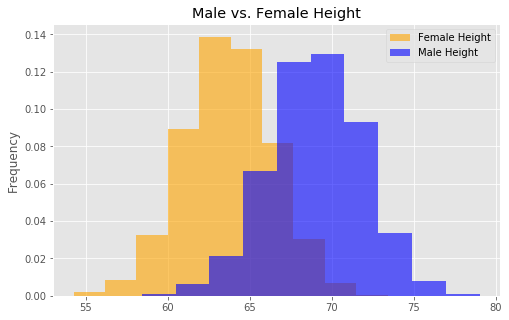

In [16]:
plt.figure(figsize=(8,5))

df_female.Height.plot.hist(bins=10, density=True, alpha=0.6, color='orange', label='Female Height')
df_male.Height.plot.hist(bins=10, density=True, alpha=0.6, color='blue', label='Male Height')

plt.title('Male vs. Female Height')
plt.legend()
plt.show()

In [9]:
# Record your observations - are these inline with your personal observations?
# They are inline. Mean vaues for male aree higher in average compare to the female onee

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

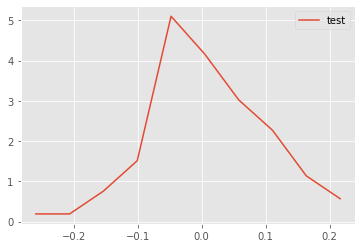

In [12]:
def density(x):
    n, bins = np.histogram(x, 10, density=1) # what are the bins representing here?
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    return pdfx, pdfy


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation 

# Where are those values 0, 0.1 coming from?

s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

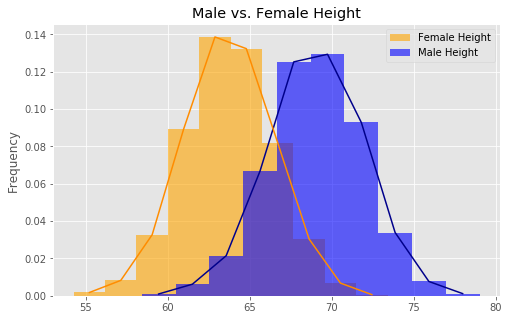

In [29]:
plt.figure(figsize=(8,5))

df_female.Height.plot.hist(bins=10, density=True, alpha=0.6, color='orange', label='Female Height')
df_male.Height.plot.hist(bins=10, density=True, alpha=0.6, color='blue', label='Male Height')
plt.legend()
plt.title('Male vs. Female Height')

x,y = density(df_male.Height)
plt.plot(x,y, color='darkblue')
x,y = density(df_female.Height)
plt.plot(x,y, color='darkorange')

plt.show()

## Repeat the above exercise for male and female weights

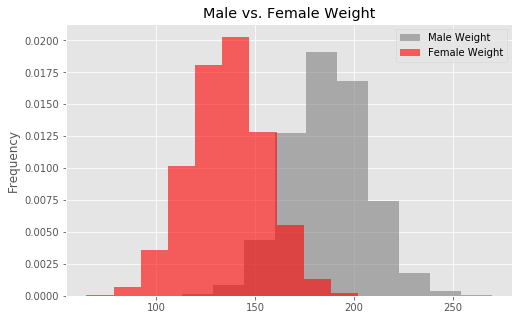

In [37]:
plt.figure(figsize=(8,5))

df_male.Weight.plot.hist(bins=10, density=True, alpha=0.6, color='grey', label='Male Weight')
df_female.Weight.plot.hist(bins=10, density=True, alpha=0.6, color='red', label='Female Weight')

plt.title('Male vs. Female Weight')
plt.legend()

plt.show()

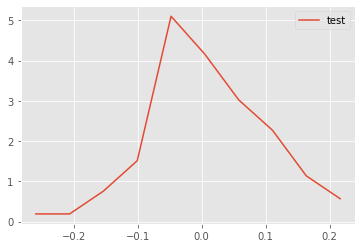

In [39]:
def density(x):
    n, bins = np.histogram(x, 10, density=1)
    
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    return pdfx, pdfy

np.random.seed(5)
mu, sigma = 0, 0.1
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label='test')
plt.legend()
plt.show()

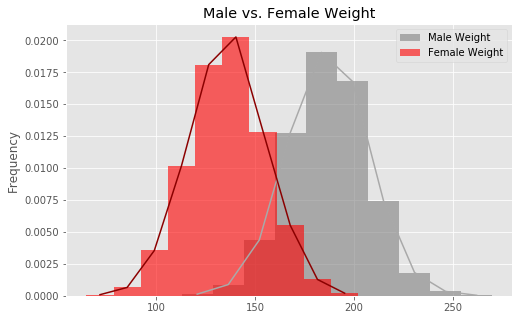

In [40]:
plt.figure(figsize=(8,5))

df_male.Weight.plot.hist(bins=10, density=True, alpha=0.6, color='grey', label='Male Weight')
df_female.Weight.plot.hist(bins=10, density=True, alpha=0.6, color='red', label='Female Weight')
plt.legend()
plt.title('Male vs. Female Weight')

x,y = density(df_male.Weight)
plt.plot(x,y, color='darkgrey')
x,y = density(df_female.Weight)
plt.plot(x,y, color='darkred')

plt.show()

## Write your observations in the cell below

In [ ]:
# Record your observations - are these inline with your personal observations?
# Everything is inline with the previous observations/calculations 
# The area covered around 160 pounds is the common one between both sexes

# What is the takeaway when comparing male and female heights and weights?
# Men are heavier and taller than women in average

## Repeat the above experiments in seaborn and compare with your results

<function matplotlib.pyplot.show(*args, **kw)>

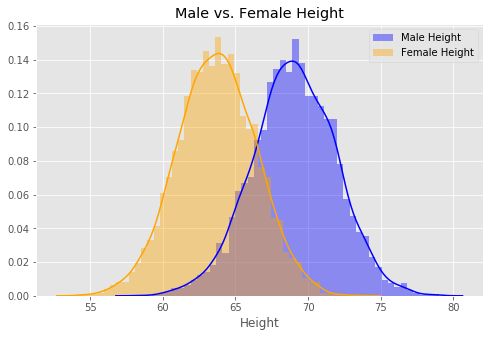

In [48]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.distplot(df_male.Height, color='blue')
sns.distplot(df_female.Height, color='orange')
plt.title('Male vs. Female Height')
plt.legend(labels=['Male Height', 'Female Height'])
plt.show

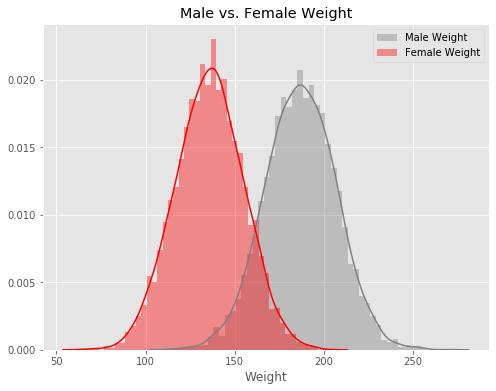

In [49]:
plt.figure(figsize=(8,6))
sns.distplot(df_male.Weight, color='grey')
sns.distplot(df_female.Weight, color='red')
plt.title('Male vs. Female Weight')
plt.legend(labels=['Male Weight', 'Female Weight'])
plt.show()

In [ ]:
# Your comments on the two approaches here. 
# Seaborn is considerably faster than matplotlib for this task. I am not sure how to control the bins though

# are they similar? what makes them different if they are?
# they are very similar but the one generated in Seaborn has considerably more bins

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.